In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [3]:
!nvidia-smi

Wed Jul 27 05:21:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    13W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Functions

In [10]:
def loss_acc(model):

  fig , ax = plt.subplots(1,2)


  test_acc = model.history.history["val_accuracy"]
  test_loss = model.history.history["val_loss"]
  train_acc = model.history.history["accuracy"]
  train_loss = model.history.history["loss"]

  epochs = range(1, len(test_acc) + 1)

  fig.set_size_inches(20,6)
  ax[0].plot(epochs , train_loss , label = 'Training Loss')
  ax[0].plot(epochs , test_loss , label = 'Testing Loss')
  ax[0].set_title('Training & Testing Loss')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")

  ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
  ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
  ax[1].set_title('Training & Testing Accuracy')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  plt.show()


# Importing Train-Test Data

In [11]:
base_dir = "/content/drive/MyDrive/Emotion-Detection/mel_spectrogram"

train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

# Directory with training normal/abnormal spectrograms
train_angry    = os.path.join(train_dir, 'angry')
train_disgust  = os.path.join(train_dir, 'disgust')
train_fear     = os.path.join(train_dir, 'fear')
train_happy    = os.path.join(train_dir, 'happy')
train_neutral  = os.path.join(train_dir, 'neutral')
train_sad      = os.path.join(train_dir, 'sad')
train_surprise = os.path.join(train_dir, 'surprise')


# Directory with test normal/abnormal spectrograms

test_angry    = os.path.join(test_dir, 'angry')
test_disgust  = os.path.join(test_dir, 'disgust')
test_fear     = os.path.join(test_dir, 'fear')
test_happy    = os.path.join(test_dir, 'happy')
test_neutral  = os.path.join(test_dir, 'neutral')
test_sad      = os.path.join(test_dir, 'sad')
test_surprise = os.path.join(test_dir, 'surprise')


In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)
test_datagen  = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)

target_size = (150, 150)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30,
                                                    class_mode="categorical",
                                                    target_size=target_size)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = "categorical",
                                                         target_size = target_size)



Found 2240 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


# First Model

In [ ]:
model_1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(target_size[0], target_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(7, activation='softmax')  
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 64)                5607488   
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 5,608,391
Trainable params: 5,608,391
Non-trainable params: 0
______________________________________________

In [ ]:
model_1.compile(optimizer=Adam(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics = ['accuracy'])


model_1.fit(
            train_generator,
            epochs=10,
            validation_data=validation_generator,
           )
print("Fitting Done")

Epoch 1/10
75/75 [==============================] - 268s 4s/step - loss: 2.6693 - accuracy: 0.1406 - val_loss: 1.9462 - val_accuracy: 0.1429
Epoch 2/10
75/75 [==============================] - 95s 1s/step - loss: 1.9474 - accuracy: 0.1362 - val_loss: 1.9462 - val_accuracy: 0.1429
Epoch 3/10
75/75 [==============================] - 93s 1s/step - loss: 1.9475 - accuracy: 0.1411 - val_loss: 1.9461 - val_accuracy: 0.1429
Epoch 4/10
75/75 [==============================] - 94s 1s/step - loss: 1.9475 - accuracy: 0.1330 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 5/10
75/75 [==============================] - 99s 1s/step - loss: 1.9471 - accuracy: 0.1330 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 6/10
75/75 [==============================] - 96s 1s/step - loss: 1.9472 - accuracy: 0.1344 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 7/10
75/75 [==============================] - 96s 1s/step - loss: 1.9473 - accuracy: 0.1326 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 8/10
75/75 [=

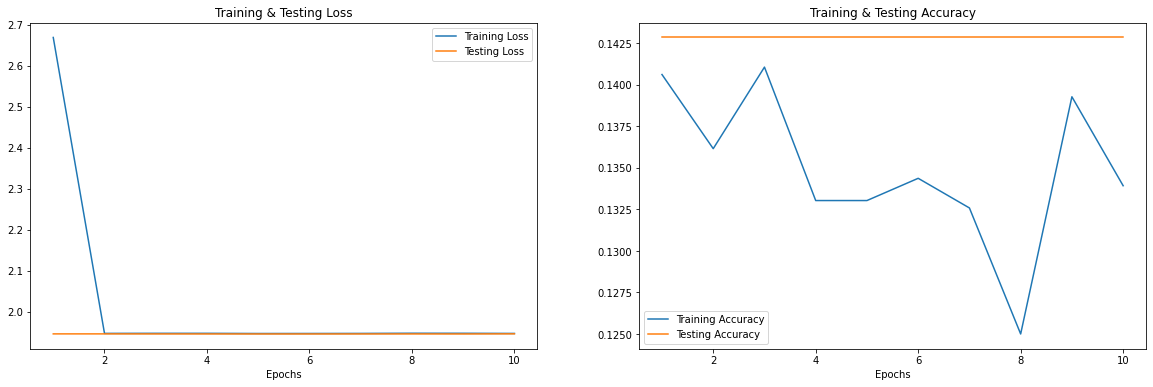

In [ ]:
loss_acc(model_1)

# Second Model

In [ ]:
model_2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(target_size[0], target_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(7, activation='softmax')  
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics = ['accuracy'])


model_2.fit(
            train_generator,
            epochs=10,
            validation_data=validation_generator,
           )
print("Fitting Done")

Epoch 1/10
75/75 [==============================] - 94s 1s/step - loss: 1.7345 - accuracy: 0.6433 - val_loss: 0.2708 - val_accuracy: 0.9250
Epoch 2/10
75/75 [==============================] - 95s 1s/step - loss: 0.0965 - accuracy: 0.9696 - val_loss: 0.0796 - val_accuracy: 0.9750
Epoch 3/10
75/75 [==============================] - 94s 1s/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.1004 - val_accuracy: 0.9768
Epoch 4/10
75/75 [==============================] - 94s 1s/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.0481 - val_accuracy: 0.9857
Epoch 5/10
75/75 [==============================] - 94s 1s/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 0.0690 - val_accuracy: 0.9839
Epoch 6/10
75/75 [==============================] - 96s 1s/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.0962 - val_accuracy: 0.9661
Epoch 7/10
75/75 [==============================] - 93s 1s/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0308 - val_accuracy: 0.9911
Epoch 8/10
75/75 [==

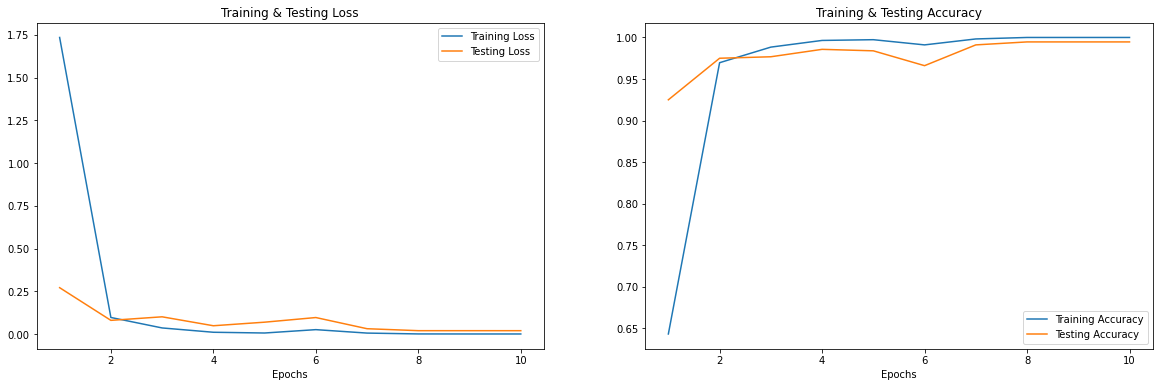

In [ ]:
loss_acc(model_2)

# Third Model


In [ ]:
model_3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(target_size[0], target_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(7, activation='softmax')  
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model_3.compile(optimizer=Adam(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics = ['accuracy'])


model_3.fit(
            train_generator,
            epochs=10,
            validation_data=validation_generator,
           )
print("Fitting Done")

Epoch 1/10
75/75 [==============================] - 96s 1s/step - loss: 2.1722 - accuracy: 0.1549 - val_loss: 1.9467 - val_accuracy: 0.1429
Epoch 2/10
75/75 [==============================] - 94s 1s/step - loss: 1.9477 - accuracy: 0.1442 - val_loss: 1.9463 - val_accuracy: 0.1429
Epoch 3/10
75/75 [==============================] - 94s 1s/step - loss: 1.9475 - accuracy: 0.1317 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 4/10
75/75 [==============================] - 93s 1s/step - loss: 1.9474 - accuracy: 0.1406 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 5/10
75/75 [==============================] - 94s 1s/step - loss: 1.9474 - accuracy: 0.1268 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/10
75/75 [==============================] - 93s 1s/step - loss: 1.9469 - accuracy: 0.1420 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 7/10
75/75 [==============================] - 93s 1s/step - loss: 1.9479 - accuracy: 0.1312 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 8/10
75/75 [==

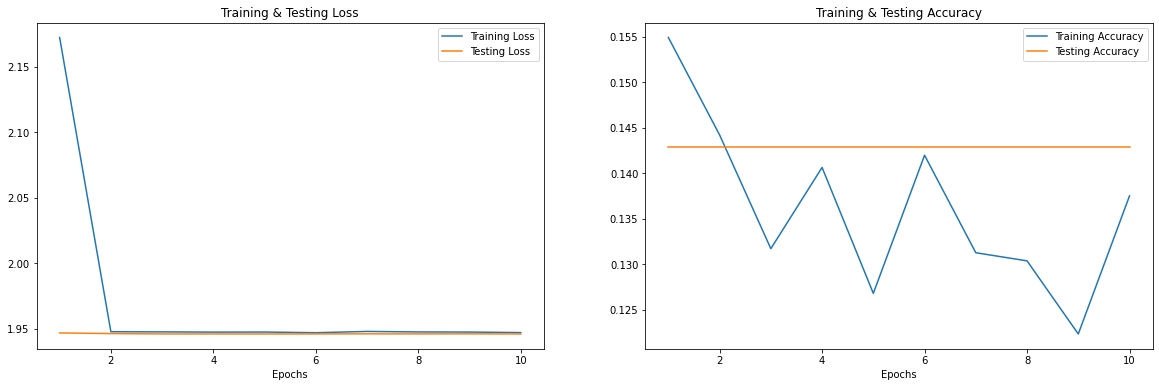

In [ ]:
loss_acc(model_3)

# Forth Model

In [46]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255, 
                                  #  rotation_range=30,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  horizontal_flip=True,
                                   dtype= tf.float64)


test_datagen  = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)

target_size = (150, 150)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30,
                                                    class_mode="categorical",
                                                    target_size=target_size)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = "categorical",
                                                         target_size = target_size)



Found 2240 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [47]:
# callback = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=2,
#     mode="min"
# )


model_4 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(target_size[0], target_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), 
    # tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(7, activation='softmax')  
])
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 41472)             0         
                                                                 
 dense_28 (Dense)            (None, 128)              

In [ ]:
model_4.compile(optimizer=Adam(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics = ['accuracy'])


model_4.fit(
            train_generator,
            epochs=20,
            validation_data=validation_generator,
           )
print("Fitting Done")

Epoch 1/20
75/75 [==============================] - 102s 1s/step - loss: 1.1350 - accuracy: 0.7732 - val_loss: 0.0945 - val_accuracy: 0.9839
Epoch 2/20
75/75 [==============================] - 96s 1s/step - loss: 0.0448 - accuracy: 0.9853 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 3/20
75/75 [==============================] - 99s 1s/step - loss: 0.0418 - accuracy: 0.9888 - val_loss: 0.0151 - val_accuracy: 0.9964
Epoch 4/20
75/75 [==============================] - 95s 1s/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/20
75/75 [==============================] - 93s 1s/step - loss: 0.0258 - accuracy: 0.9933 - val_loss: 0.0071 - val_accuracy: 0.9964
Epoch 6/20
75/75 [==============================] - 93s 1s/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0118 - val_accuracy: 0.9946
Epoch 7/20
75/75 [==============================] - 92s 1s/step - loss: 6.9243e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9982
Epoch 8/20
75/7

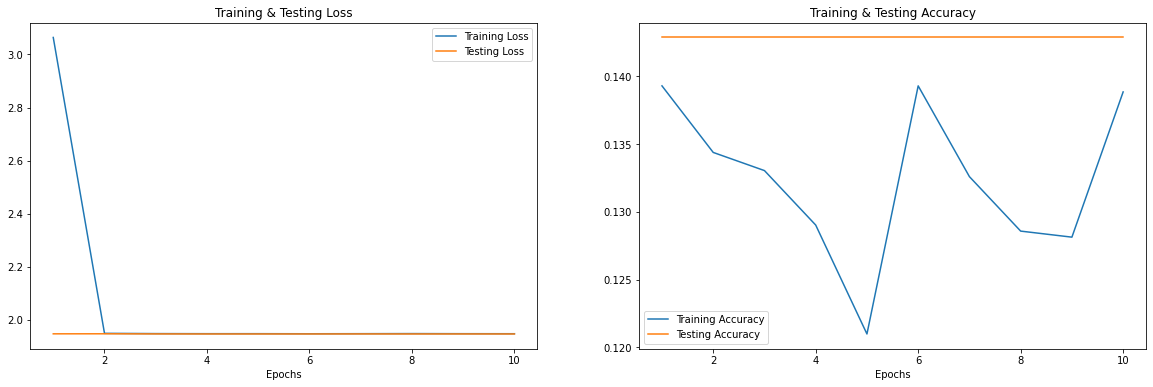

In [ ]:
loss_acc(model_4)

# Transfer Learning `EfficientNetB3`

In [33]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)
test_datagen  = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)

target_size = (150, 150)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    class_mode="categorical",
                                                    target_size=target_size)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=25,
                                                         class_mode  = "categorical",
                                                         target_size = target_size)



Found 2240 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [34]:
model_name='EfficientNetB3'
efficient_model=tf.keras.applications.EfficientNetB3(
                                      include_top=False, 
                                      weights="imagenet",
                                      input_shape=(target_size[0], target_size[1], 3),
                                      pooling='max') 

x=efficient_model.output

x=tf.keras.layers.BatchNormalization(axis=-1, 
                                  momentum=0.99,
                                  epsilon=0.001 )(x)

x = Dense(256, 
          kernel_regularizer   = tf.keras.regularizers.l2(l = 0.05),
          activity_regularizer = tf.keras.regularizers.l1(0.05),
          bias_regularizer     = tf.keras.regularizers.l1(0.05),
          activation='relu')(x)
          
x=tf.keras.layers.Dropout(rate=.45, seed=123)(x)  

output=Dense(7, activation='softmax')(x)

eff_model=tf.keras.models.Model(inputs=efficient_model.input, outputs=output)

eff_model.compile(tf.keras.optimizers.Adamax(learning_rate=.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

# eff_model.summary()

In [35]:
eff_model.fit(
            train_generator,
            epochs=25,
            validation_data=validation_generator,
           )
print("Fitting Done")

Epoch 1/25
45/45 [==============================] - 112s 2s/step - loss: 22.1103 - accuracy: 0.7415 - val_loss: 17.6656 - val_accuracy: 0.1429
Epoch 2/25
45/45 [==============================] - 94s 2s/step - loss: 13.3407 - accuracy: 0.9580 - val_loss: 12.4169 - val_accuracy: 0.1429
Epoch 3/25
45/45 [==============================] - 94s 2s/step - loss: 9.3593 - accuracy: 0.9781 - val_loss: 8.9780 - val_accuracy: 0.1429
Epoch 4/25
45/45 [==============================] - 97s 2s/step - loss: 6.6729 - accuracy: 0.9915 - val_loss: 6.7828 - val_accuracy: 0.1429
Epoch 5/25
45/45 [==============================] - 104s 2s/step - loss: 4.8382 - accuracy: 0.9960 - val_loss: 5.3822 - val_accuracy: 0.1429
Epoch 6/25
45/45 [==============================] - 102s 2s/step - loss: 3.5955 - accuracy: 0.9951 - val_loss: 4.4163 - val_accuracy: 0.1429
Epoch 7/25
45/45 [==============================] - 98s 2s/step - loss: 2.7382 - accuracy: 0.9978 - val_loss: 3.6858 - val_accuracy: 0.1571
Epoch 8/25
45

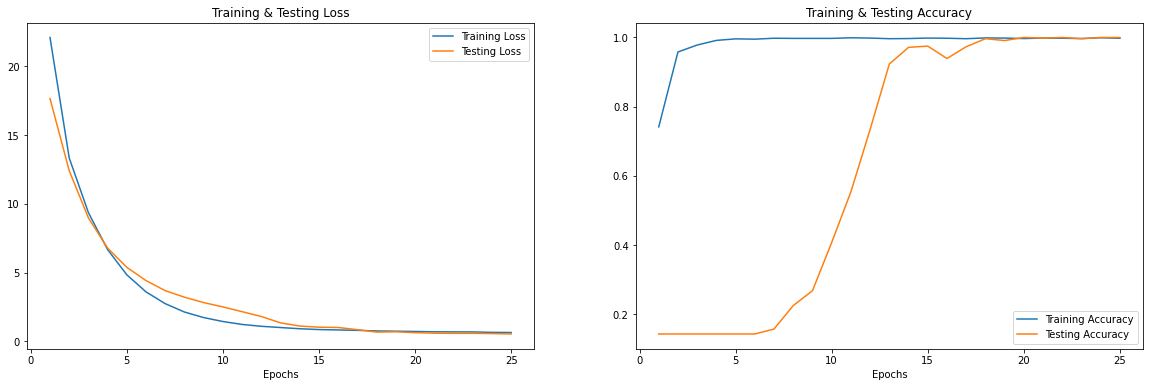

In [36]:
loss_acc(eff_model)

# Efficient Model With Augmentation


In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255, 
                                   rotation_range=30,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                   shear_range=0.2,
                                  #  zoom_range=0.2,
                                   horizontal_flip=True,
                                   dtype= tf.float64)

test_datagen  = ImageDataGenerator( rescale = 1.0/255, dtype= tf.float64)

target_size = (150, 150)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    class_mode="categorical",
                                                    target_size=target_size)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=30,
                                                         class_mode  = "categorical",
                                                         target_size = target_size)



In [ ]:
model_name='EfficientNetB3'

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=,
#     verbose=0,
#     mode="min",
#     baseline=None,
#     restore_best_weights=False,
# )




efficient_model_2=tf.keras.applications.EfficientNetB3(
                                      include_top=False, 
                                      weights="imagenet",
                                      input_shape=(target_size[0], target_size[1], 3),
                                      pooling='max') 

x=efficient_model_2.output

x=tf.keras.layers.BatchNormalization(axis=-1, 
                                  momentum=0.99,
                                  epsilon=0.001 )(x)

x = Dense(256, 
          kernel_regularizer   = tf.keras.regularizers.l2(l = 0.05),
          activity_regularizer = tf.keras.regularizers.l1(0.05),
          bias_regularizer     = tf.keras.regularizers.l1(0.05),
          activation='relu')(x)
          
x=tf.keras.layers.Dropout(rate=.45, seed=123)(x)  

output=Dense(7, activation='softmax')(x)

eff_model_2=tf.keras.models.Model(inputs=efficient_model.input, outputs=output)

eff_model_2.compile(tf.keras.optimizers.Adamax(learning_rate=.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
              callbacks=[callback]) 

# eff_model.summary()

In [ ]:
eff_model_2.fit(
            train_generator,
            epochs=25,
            validation_data=validation_generator,
           )
print("Fitting Done")